<a href="https://colab.research.google.com/github/RaisB17/deep_learning/blob/main/week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score




In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/Infrared.csv')

# Explore Data

In [4]:
data

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Female,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.3475,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.99
1016,Female,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2175,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.19
1017,Female,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2400,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.59
1018,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,35.0200,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.29


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

In [6]:
data.select_dtypes(include=np.number).corr()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
T_atm,1.000000,0.119270,0.033377,0.616912,0.275363,0.292344,0.269869,0.311260,0.287289,0.280530,...,0.368740,0.388760,0.393838,0.329755,0.339329,0.389521,0.242280,0.233001,0.230146,0.098663
Humidity,0.119270,1.000000,0.008468,0.224086,0.050884,0.060754,0.101012,0.112754,0.058080,0.044929,...,0.033311,0.040234,0.061012,0.036980,0.006943,0.038868,0.064231,0.111888,0.110408,0.063595
Distance,0.033377,0.008468,1.000000,0.024831,-0.024479,-0.022900,-0.051634,-0.054362,-0.012427,-0.024331,...,-0.008938,-0.009554,-0.022870,-0.014081,-0.022385,-0.012941,0.007898,0.013631,0.014242,0.011181
T_offset1,0.616912,0.224086,0.024831,1.000000,0.239208,0.260545,0.237177,0.279728,0.249420,0.242019,...,0.348724,0.368220,0.371284,0.317587,0.304540,0.355541,0.191369,0.181496,0.177910,0.139041
Max1R13_1,0.275363,0.050884,-0.024479,0.239208,1.000000,0.901213,0.868731,0.825698,0.981819,0.995478,...,0.665614,0.617565,0.702868,0.566860,0.703221,0.720179,0.873412,0.734474,0.733324,0.741902
Max1L13_1,0.292344,0.060754,-0.022900,0.260545,0.901213,1.000000,0.775313,0.896370,0.906892,0.901218,...,0.640706,0.612534,0.692723,0.559005,0.691522,0.707298,0.867470,0.729175,0.727941,0.735644
aveAllR13_1,0.269869,0.101012,-0.051634,0.237177,0.868731,0.775313,1.000000,0.858994,0.826354,0.868849,...,0.609243,0.581719,0.683231,0.535339,0.628209,0.664829,0.745489,0.657640,0.656137,0.620874
aveAllL13_1,0.311260,0.112754,-0.054362,0.279728,0.825698,0.896370,0.858994,1.000000,0.809478,0.826757,...,0.620341,0.599982,0.697290,0.551961,0.653166,0.677782,0.774758,0.675740,0.674287,0.645084
T_RC1,0.287289,0.058080,-0.012427,0.249420,0.981819,0.906892,0.826354,0.809478,1.000000,0.982699,...,0.667143,0.620701,0.704861,0.570513,0.715962,0.729618,0.892319,0.746736,0.745588,0.768730
T_RC_Dry1,0.280530,0.044929,-0.024331,0.242019,0.995478,0.901218,0.868849,0.826757,0.982699,1.000000,...,0.678681,0.630409,0.717506,0.579582,0.718977,0.734562,0.878937,0.736340,0.735246,0.748566


In [7]:
data.duplicated().sum()

0

<Axes: >

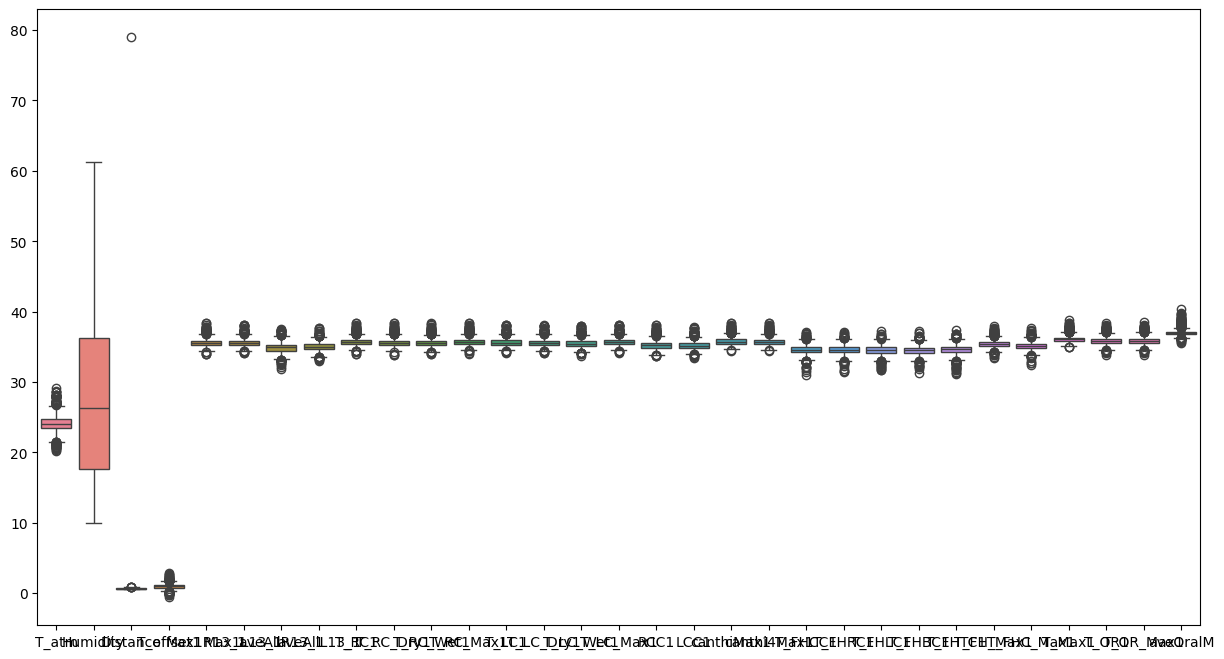

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data)

In [9]:
X = data.select_dtypes(include=np.number).drop('aveOralM',axis=1)
y = data['aveOralM']

In [10]:
y

,aveOralM
0,36.59
1,37.19
2,37.34
3,37.09
4,37.04
...,...
1015,36.99
1016,37.19
1017,37.59
1018,37.29


In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

y_scaler = StandardScaler()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

In [14]:
X_train.shape[1]

30

In [15]:
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

# Tensorflow regresi

In [16]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)
model = tf.keras.Model(inputs, outputs)
earlystopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, batch_size = 32, validation_split = 0.15, epochs = 100, callbacks =[earlystopping] )


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 1.4439 - val_loss: 0.7424
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5568 - val_loss: 0.2934
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2911 - val_loss: 0.2845
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2958 - val_loss: 0.2574
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2919 - val_loss: 0.2618
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2605 - val_loss: 0.2444
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2368 - val_loss: 0.2523
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2514 - val_loss: 0.2451
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2194 - val_loss: 0.2472
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2161 - val_loss: 0.2524
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2110 - val_loss: 0.2526
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step 

In [17]:
y_pred = model.predict(X_test)

rmse = np.sqrt(model.evaluate(X_test, y_test))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2271 
RMSE: 0.46285938205789173
R2 Score: 0.7237510992806916


# Pytorch regresi

In [18]:
class net(nn.Module):
    def __init__(self, input_size):
        super(net, self).__init__()
        self.fc1 = nn.Linear(30, 64)
        self.out = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.out(x)
        return x
net = net(X_train.shape[1])

In [19]:
X_train = torch.tensor( X_train, dtype=torch.float32)
y_train = torch.tensor( y_train, dtype=torch.float32).view(-1,1)

X_test = torch.tensor( X_test, dtype=torch.float32)
y_test = torch.tensor( y_test, dtype=torch.float32).view(-1,1)

In [20]:
optimizer = optim.Adam(net.parameters(), lr=0.0005)
criterion = nn.MSELoss()

In [21]:
# DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Early Stopping Setup
best_loss = float('inf')
patience = 5
counter = 0


# Training Loop
for epoch in range(100):
    net.train()  # Set mode training
    total_loss = 0
    for x, target in train_loader:
        optimizer.zero_grad()
        output = net(x)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}: Loss = {avg_loss:.6f}")

    if avg_loss < best_loss:
        best_loss = avg_loss
        best_model = net.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            net.load_state_dict(best_model)
            break


Epoch 1: Loss = 0.698128
Epoch 2: Loss = 0.412327
Epoch 3: Loss = 0.352925
Epoch 4: Loss = 0.320512
Epoch 5: Loss = 0.297496
Epoch 6: Loss = 0.285496
Epoch 7: Loss = 0.269371
Epoch 8: Loss = 0.256429
Epoch 9: Loss = 0.246227
Epoch 10: Loss = 0.243926
Epoch 11: Loss = 0.240693
Epoch 12: Loss = 0.237789
Epoch 13: Loss = 0.230972
Epoch 14: Loss = 0.227651
Epoch 15: Loss = 0.228313
Epoch 16: Loss = 0.223224
Epoch 17: Loss = 0.220430
Epoch 18: Loss = 0.221361
Epoch 19: Loss = 0.222309
Epoch 20: Loss = 0.217010
Epoch 21: Loss = 0.211718
Epoch 22: Loss = 0.215709
Epoch 23: Loss = 0.212088
Epoch 24: Loss = 0.212496
Epoch 25: Loss = 0.208637
Epoch 26: Loss = 0.208741
Epoch 27: Loss = 0.207632
Epoch 28: Loss = 0.207289
Epoch 29: Loss = 0.206893
Epoch 30: Loss = 0.207876
Epoch 31: Loss = 0.206429
Epoch 32: Loss = 0.201795
Epoch 33: Loss = 0.203020
Epoch 34: Loss = 0.204557
Epoch 35: Loss = 0.198812
Epoch 36: Loss = 0.201432
Epoch 37: Loss = 0.200328
Epoch 38: Loss = 0.198525
Epoch 39: Loss = 0.20

In [22]:
net.eval()  # Mode evaluasi
y_pred_list, y_true_list = [], []

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

with torch.no_grad():  # Nonaktifkan grad untuk evaluasi
    for x_batch, y_batch in test_loader:
        output = net(x_batch)  # Model menghasilkan prediksi

        # Untuk regresi, hasil langsung digunakan tanpa thresholding
        y_pred = output.squeeze()  # Hilangkan dimensi ekstra jika ada

        y_pred_list.extend(y_pred.cpu().numpy())
        y_true_list.extend(y_batch.cpu().numpy())

# Konversi ke NumPy
y_pred_array = np.array(y_pred_list)
y_true_array = np.array(y_true_list)

In [23]:
print("RMSE:", np.sqrt(mean_squared_error(y_true_array, y_pred_array)))
print("R2 Score:", r2_score(y_true_array, y_pred_array))

RMSE: 0.42689461337672246
R2 Score: 0.7650130391120911


1. Mean Squared Error (MSE)
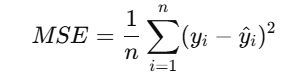

-Mengukur rata-rata dari kuadrat kesalahan antara nilai aktual (y) dan prediksi (ŷ).
-Makin kecil nilai MSE, makin baik modelnya.

2.Root Mean Squared Error (RMSE)
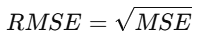

-Akar dari MSE, memberikan kesalahan dalam satuan yang sama dengan target.
-RMSE lebih sensitif terhadap outlier dibanding MSE

3. R-Squared (R²)

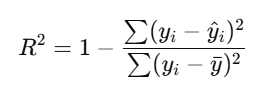

-Mengukur seberapa baik model menjelaskan variabilitas data.
-Nilai R² = 1 berarti prediksi sempurna, R² = 0 berarti prediksi tidak lebih baik dari rata-rata.

kesimpulan
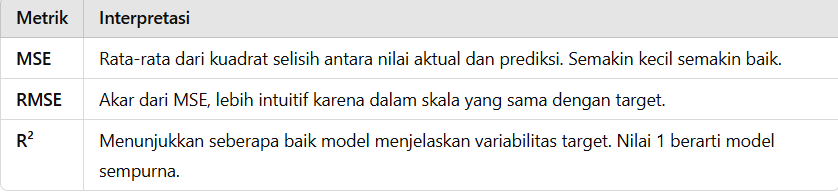






# tensorflow klasifikasi

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/income.csv')

In [25]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [26]:
data.duplicated().sum()

29

In [27]:
data.drop_duplicates(inplace=True)

In [28]:
data.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [29]:
data.dropna(inplace=True)

In [30]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [31]:
data.select_dtypes(include=np.number).corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.075777,0.033141,0.077999,0.057736,0.079061
fnlwgt,-0.075777,1.000000,-0.040974,-0.003896,-0.004958,-0.016143
education-num,0.033141,-0.040974,1.000000,0.125609,0.081796,0.143913
capital-gain,0.077999,-0.003896,0.125609,1.000000,-0.031711,0.082275
capital-loss,0.057736,-0.004958,0.081796,-0.031711,1.000000,0.055330
hours-per-week,0.079061,-0.016143,0.143913,0.082275,0.055330,1.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47592 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47592 non-null  int64 
 1   workclass       47592 non-null  object
 2   fnlwgt          47592 non-null  int64 
 3   education       47592 non-null  object
 4   education-num   47592 non-null  int64 
 5   marital-status  47592 non-null  object
 6   occupation      47592 non-null  object
 7   relationship    47592 non-null  object
 8   race            47592 non-null  object
 9   sex             47592 non-null  object
 10  capital-gain    47592 non-null  int64 
 11  capital-loss    47592 non-null  int64 
 12  hours-per-week  47592 non-null  int64 
 13  native-country  47592 non-null  object
 14  income          47592 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [33]:
data['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [34]:
data['income'] = data['income'].astype(str).str.replace('.', '')

In [35]:
encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47592 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             47592 non-null  int64
 1   workclass       47592 non-null  int64
 2   fnlwgt          47592 non-null  int64
 3   education       47592 non-null  int64
 4   education-num   47592 non-null  int64
 5   marital-status  47592 non-null  int64
 6   occupation      47592 non-null  int64
 7   relationship    47592 non-null  int64
 8   race            47592 non-null  int64
 9   sex             47592 non-null  int64
 10  capital-gain    47592 non-null  int64
 11  capital-loss    47592 non-null  int64
 12  hours-per-week  47592 non-null  int64
 13  native-country  47592 non-null  int64
 14  income          47592 non-null  int64
dtypes: int64(15)
memory usage: 5.8 MB


In [37]:
data.select_dtypes(include=np.number).corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.019270,-0.077828,-0.009854,0.033141,-0.265027,-0.014982,-0.259448,0.027789,0.086760,0.126293,0.062505,0.079194,-0.002324,0.231951
workclass,0.019270,1.000000,-0.023690,0.018349,0.041320,-0.052881,0.196587,-0.080481,0.055397,0.085464,0.022946,0.014112,0.114924,-0.004803,0.035940
fnlwgt,-0.077828,-0.023690,1.000000,-0.023996,-0.040425,0.031314,0.000402,0.007577,-0.012594,0.028776,-0.007000,-0.004009,-0.015368,-0.057355,-0.007095
education,-0.009854,0.018349,-0.023996,1.000000,0.356711,-0.039854,-0.022214,-0.011974,0.013634,-0.027266,0.033038,0.017779,0.058350,0.066503,0.081259
education-num,0.033141,0.041320,-0.040425,0.356711,1.000000,-0.068859,0.105001,-0.090376,0.031218,0.007754,0.153756,0.085279,0.145040,0.061921,0.332980
marital-status,-0.265027,-0.052881,0.031314,-0.039854,-0.068859,1.000000,-0.005848,0.185554,-0.069779,-0.126554,-0.074123,-0.034753,-0.185584,-0.021625,-0.196640
occupation,-0.014982,0.196587,0.000402,-0.022214,0.105001,-0.005848,1.000000,-0.067567,0.004752,0.069838,0.023900,0.017347,0.060643,-0.007484,0.066585
relationship,-0.259448,-0.080481,0.007577,-0.011974,-0.090376,0.185554,-0.067567,1.000000,-0.117834,-0.581571,-0.093686,-0.060112,-0.254283,-0.004624,-0.253330
race,0.027789,0.055397,-0.012594,0.013634,0.031218,-0.069779,0.004752,-0.117834,1.000000,0.087803,0.025240,0.018712,0.040936,0.133851,0.071092
sex,0.086760,0.085464,0.028776,-0.027266,0.007754,-0.126554,0.069838,-0.581571,0.087803,1.000000,0.076550,0.049207,0.231159,-0.009453,0.215346


In [38]:
X = data.select_dtypes(include=np.number).drop('income', axis=1)
y = data['income']

In [39]:
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
48836,0
48837,0
48839,0
48840,0


In [40]:
Counter(y)

Counter({0: 36053, 1: 11539})

In [41]:
smote = SMOTE(sampling_strategy={0: 50000, 1: 50000}, random_state=42)

# Terapkan ke X_train dan y_train
X_resampled, y_resampled = smote.fit_resample(X, y)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

In [43]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
y_train.shape

(80000,)

In [45]:
X_train.shape

(80000, 14)

In [46]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [47]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)
earlystopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
model.fit(X_train, y_train, batch_size = 32, validation_split = 0.15, epochs = 100, callbacks =[earlystopping] )

Epoch 1/100
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7866 - loss: 0.4426 - val_accuracy: 0.8377 - val_loss: 0.3694
Epoch 2/100
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8348 - loss: 0.3685 - val_accuracy: 0.8406 - val_loss: 0.3629
Epoch 3/100
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8356 - loss: 0.3621 - val_accuracy: 0.8418 - val_loss: 0.3574
Epoch 4/100
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8385 - loss: 0.3567 - val_accuracy: 0.8426 - val_loss: 0.3560
Epoch 5/100
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8405 - loss: 0.3529 - val_accuracy: 0.8432 - val_loss: 0.3538
Epoch 6/100
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8397 - loss: 0.3502 - val_accuracy: 0.8457 - val_loss: 0.3510
Epoch 7/100
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8419 - loss: 0.3461 - val_accuracy: 0.8432 - val_loss: 0.3489
Epoch 8/100
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8431 - loss

In [49]:
y_pred_probs = model.predict(X_test)  # Probabilitas output
y_pred = (y_pred_probs > 0.5).astype(int)  # Konversi ke kelas

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [50]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [51]:
from sklearn.preprocessing import label_binarize

c_m = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", c_m)

# Konversi label ke one-hot encoding untuk AUC
y_test_bin = label_binarize(y_test, classes=[0, 1])

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs)  # Tanpa multi_class='ovr'

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Confusion Matrix:
 [[8333 1708]
 [1238 8721]]
Accuracy: 0.8527
Precision: 0.8362
Recall: 0.8757
F1-score: 0.8555
AUC: 0.9336


In [57]:
class net(nn.Module):
    def __init__(self, input_size):
        super(net, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.out = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.out(x))
        return x
net = net(X_train.shape[1])

In [59]:
X_train = torch.tensor( X_train, dtype=torch.float32)
y_train = torch.tensor( y_train, dtype=torch.float32).view(-1,1)

X_test = torch.tensor( X_test, dtype=torch.float32)
y_test = torch.tensor( y_test, dtype=torch.float32).view(-1,1)

<ipython-input-59-ef39ceaaa639>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor( X_train, dtype=torch.float32)
<ipython-input-59-ef39ceaaa639>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor( y_train, dtype=torch.float32).view(-1,1)
<ipython-input-59-ef39ceaaa639>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor( X_test, dtype=torch.float32)
<ipython-input-59-ef39ceaaa639>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().det

In [60]:
optimizer = optim.Adam(net.parameters(), lr=0.0005)
criterion = nn.BCELoss()

In [62]:
# DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

epochs = 100
best_loss = float('inf')
patience = 5
counter = 0

print("Starting training...")

for epoch in range(epochs):
    net.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = net(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}: Loss = {avg_loss:.6f}")

    # Early Stopping
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_model = net.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            net.load_state_dict(best_model)
            break


Starting training...
Epoch 1: Loss = 0.314755
Epoch 2: Loss = 0.314782
Epoch 3: Loss = 0.314428
Epoch 4: Loss = 0.314412
Epoch 5: Loss = 0.314301
Epoch 6: Loss = 0.314102
Epoch 7: Loss = 0.314011
Epoch 8: Loss = 0.313851
Epoch 9: Loss = 0.313771
Epoch 10: Loss = 0.313576
Epoch 11: Loss = 0.313602
Epoch 12: Loss = 0.313523
Epoch 13: Loss = 0.313510
Epoch 14: Loss = 0.313158
Epoch 15: Loss = 0.313209
Epoch 16: Loss = 0.312989
Epoch 17: Loss = 0.312952
Epoch 18: Loss = 0.312708
Epoch 19: Loss = 0.312779
Epoch 20: Loss = 0.312948
Epoch 21: Loss = 0.312425
Epoch 22: Loss = 0.312544
Epoch 23: Loss = 0.312618
Epoch 24: Loss = 0.312570
Epoch 25: Loss = 0.312213
Epoch 26: Loss = 0.312341
Epoch 27: Loss = 0.312392
Epoch 28: Loss = 0.312234
Epoch 29: Loss = 0.312291
Epoch 30: Loss = 0.312053
Epoch 31: Loss = 0.311792
Epoch 32: Loss = 0.312122
Epoch 33: Loss = 0.312125
Epoch 34: Loss = 0.311789
Epoch 35: Loss = 0.312098
Epoch 36: Loss = 0.311479
Epoch 37: Loss = 0.311723
Epoch 38: Loss = 0.311615


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluasi Model
net.eval()
y_pred_list, y_true_list = [], []

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        output = net(X_batch)

        # Konversi probabilitas ke kelas biner
        y_pred = (output > 0.5).float()

        y_pred_list.extend(y_pred.cpu().numpy())
        y_true_list.extend(y_batch.cpu().numpy())

# Konversi ke NumPy untuk evaluasi
y_pred_array = np.array(y_pred_list)
y_true_array = np.array(y_true_list)

# Evaluasi Metrik
accuracy = accuracy_score(y_true_array, y_pred_array)
precision = precision_score(y_true_array, y_pred_array)
recall = recall_score(y_true_array, y_pred_array)
f1 = f1_score(y_true_array, y_pred_array)
auc = roc_auc_score(y_true_array, y_pred_array)

# Cetak hasil evaluasi
print(f"Akurasi  : {accuracy:.4f}")
print(f"Presisi  : {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC-ROC  : {auc:.4f}")


Akurasi  : 0.8530
Presisi  : 0.8282
Recall   : 0.8894
F1 Score : 0.8577
AUC-ROC  : 0.8532


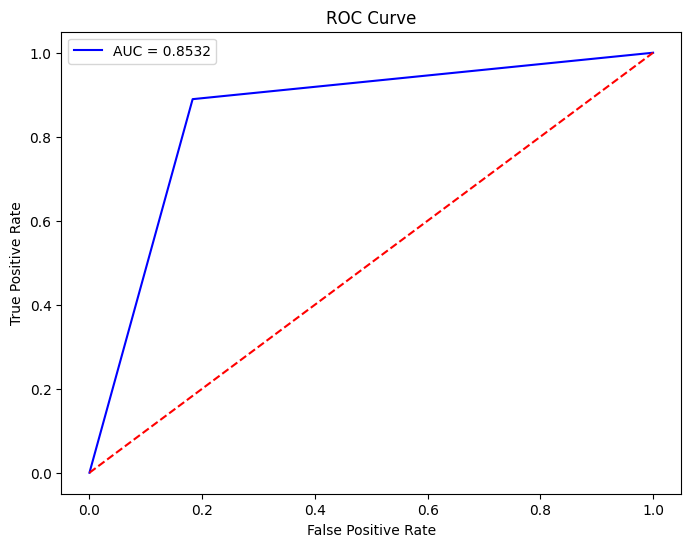

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Hitung ROC Curve
fpr, tpr, _ = roc_curve(y_true_array, y_pred_array)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")  # Garis diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


1. Akurasi (Accuracy)
Akurasi mengukur persentase prediksi yang benar dari seluruh data.
🔹 Cocok untuk: dataset seimbang dengan jumlah kelas yang hampir sama.
🔹 Formula:

Accuracy = Jumlah Prediksi Benar/total sampel

2. Presisi (Precision)
Presisi mengukur berapa banyak prediksi positif yang benar dibandingkan total prediksi positif.
🔹 Cocok untuk: dataset tidak seimbang (banyak negatif, sedikit positif).
🔹 Formula:
precision = true positives(tp)/true positives(tp)+false positives(fp)

3. Recall (Sensitivity)
Recall mengukur berapa banyak kelas positif yang benar terdeteksi dibandingkan jumlah kelas positif yang sebenarnya.
🔹 Cocok untuk: kasus di mana penting untuk menangkap semua positif (misalnya deteksi penyakit).
🔹 Formula:
recall = true positives(tp)/true positives(tp)+false negatives(fn)

4. F1-Score
F1-Score adalah rata-rata harmonis dari precision dan recall, yang lebih baik digunakan jika dataset tidak seimbang.
🔹 Formula:
f1 = 2 x (precision x recall)/(precision+recall)

5. Confusion Matrix
Confusion matrix menunjukkan jumlah prediksi yang benar dan salah dalam setiap kelas.
🔹 Cocok untuk: memahami kesalahan model dalam setiap kelas.

6. AUC-ROC (Area Under Curve - Receiver Operating Characteristic)
AUC-ROC digunakan untuk mengevaluasi kemampuan model membedakan antara kelas positif dan negatif.
🔹 Cocok untuk: klasifikasi biner dan dataset tidak seimbang.

7. Log-Loss (Logarithmic Loss)
Log-loss menghitung seberapa jauh probabilitas prediksi dari label yang benar.
🔹 Cocok untuk: mengevaluasi model probabilistik.
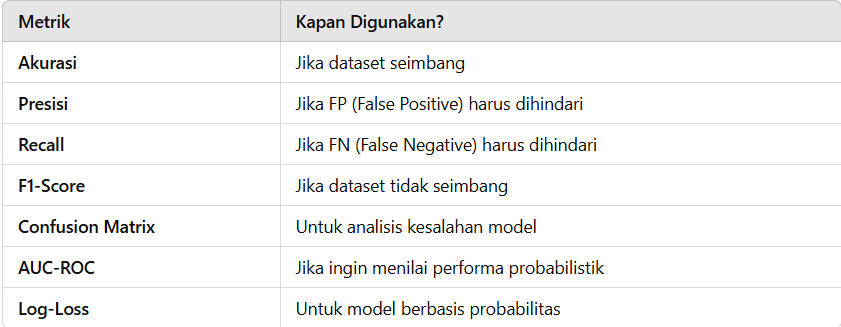